In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
# data_path = '/content/drive/MyDrive/MS thesis/HFCAI/rg1-revised-cleaned.csv'
data_path = '/content/drive/MyDrive/MS thesis/HFCAI/RG1/rg1_raw.csv'
df = pd.read_csv(data_path)
df.head(2)

<ipython-input-50-aacfc546f916>:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,fid,bg_name,cm_name,pr_name,Neighbors3,DESCRIPT,name,popden_chi,popden_eld,popden_all,...,drought_me,floodprob_,rain_inten,rg1-rhu-hu,children_m,elderly_me,phall_mean,women_mean,women_repr,youth_mean
0,2933033,Barangay III (Pob.),City of Vigan,Ilocos Sur,"2933033, 2933033, 2933033, 2933034, 2933033, 2...",0.0,Quezon Avenue,1152.388301,1180.214626,12917.618413,...,1.335638,1.619176,NaN,PhilHealth Dialysis Center,0.78181,0.800688,8.314924,4.283271,2.236034,1.607183
1,2933033,Barangay VI (Pob.),City of Vigan,Ilocos Sur,"2933033, 2933033, 2933034, 2933033, 2933032, 2...",0.0,Quezon Avenue,1152.388301,1180.214626,12917.618413,...,1.268513,1.279595,NaN,Tourism,0.78181,0.800688,8.314924,4.283271,2.236034,1.607183


## short cleaning
- pois
- population demographic edits
- renaming issues

In [51]:
# Columns to check
columns_to_check = ['Facility N', 'name', 'rg1-rhu-hu']

# Function to apply to each column
def label_presence(value):
    return 1 if pd.notna(value) and isinstance(value, str) else 0

# Apply the function to each specified column
for column in columns_to_check:
    df[f'{column}_label'] = df[column].apply(label_presence)

# Drop the original columns if needed
df = df.drop(columns=columns_to_check)
df

,fid,bg_name,cm_name,pr_name,Neighbors3,DESCRIPT,popden_chi,popden_eld,popden_all,popden_wom,...,rain_inten,children_m,elderly_me,phall_mean,women_mean,women_repr,youth_mean,Facility N_label,name_label,rg1-rhu-hu_label
0,2933033,Barangay III (Pob.),City of Vigan,Ilocos Sur,"2933033, 2933033, 2933033, 2933034, 2933033, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
1,2933033,Barangay VI (Pob.),City of Vigan,Ilocos Sur,"2933033, 2933033, 2933034, 2933033, 2933032, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
2,2933033,Barangay 6 (Pob.),Bantay,Ilocos Sur,"2933033, 2933034, 2933033, 2933032, 2933033, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
3,2933033,Buquig,Bantay,Ilocos Sur,"2933033, 2933032, 2933033, 2933032, 2933033, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
4,2933033,Capangpangan,City of Vigan,Ilocos Sur,"2933033, 2933032, 2933033, 2933034, 2934414, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383995,2948266,Baluarte,Salcedo (Baugen),Ilocos Sur,"2948266, 2948267",NaN,0.000000,0.000000,326.682515,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
383996,2949648,Baluarte,Salcedo (Baugen),Ilocos Sur,"2949648, 2951030, 2949649",NaN,0.000000,0.000000,231.337560,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
383997,2948267,Baluarte,Salcedo (Baugen),Ilocos Sur,2948267,NaN,0.000000,0.000000,218.385156,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
383998,2949649,Baluarte,Salcedo (Baugen),Ilocos Sur,2949649,NaN,0.000000,0.000000,212.951586,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [52]:
print(df['rg1-rhu-hu_label'].unique())
# Column to check
column_to_check = 'rg1-rhu-hu_label'

# Function to apply to the column
def label_pois(value):
    return 1 if value > 0 else 0

# Apply the function to the specified column
df['POI_Presence'] = df[column_to_check].apply(label_pois)

# Fill any remaining NaN values in 'pois_label' with 0
df['POI_Presence'].fillna(0, inplace=True)

# Optionally drop the original 'pois' column
df = df.drop(columns=[column_to_check])
df

[1 0]


,fid,bg_name,cm_name,pr_name,Neighbors3,DESCRIPT,popden_chi,popden_eld,popden_all,popden_wom,...,rain_inten,children_m,elderly_me,phall_mean,women_mean,women_repr,youth_mean,Facility N_label,name_label,POI_Presence
0,2933033,Barangay III (Pob.),City of Vigan,Ilocos Sur,"2933033, 2933033, 2933033, 2933034, 2933033, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
1,2933033,Barangay VI (Pob.),City of Vigan,Ilocos Sur,"2933033, 2933033, 2933034, 2933033, 2933032, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
2,2933033,Barangay 6 (Pob.),Bantay,Ilocos Sur,"2933033, 2933034, 2933033, 2933032, 2933033, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
3,2933033,Buquig,Bantay,Ilocos Sur,"2933033, 2933032, 2933033, 2933032, 2933033, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
4,2933033,Capangpangan,City of Vigan,Ilocos Sur,"2933033, 2933032, 2933033, 2933034, 2934414, 2...",0.0,1152.388301,1180.214626,12917.618413,6313.541875,...,NaN,0.781810,0.800688,8.314924,4.283271,2.236034,1.607183,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383995,2948266,Baluarte,Salcedo (Baugen),Ilocos Sur,"2948266, 2948267",NaN,0.000000,0.000000,326.682515,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
383996,2949648,Baluarte,Salcedo (Baugen),Ilocos Sur,"2949648, 2951030, 2949649",NaN,0.000000,0.000000,231.337560,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
383997,2948267,Baluarte,Salcedo (Baugen),Ilocos Sur,2948267,NaN,0.000000,0.000000,218.385156,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
383998,2949649,Baluarte,Salcedo (Baugen),Ilocos Sur,2949649,NaN,0.000000,0.000000,212.951586,0.000000,...,0.191788,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [53]:
# Custom aggregation function (no need for list processing)
def has_at_least_one_is_one(series):
    return 1 if any(x == 1 for x in series) else 0  # Check for at least one '1'

# List columns to aggregate
columns_to_aggregate = ['Facility N_label', 'name_label', 'POI_Presence']

# Create the aggregation dictionary
agg_dict = {
    col: has_at_least_one_is_one if col == 'POI_Presence' else 'first' for col in columns_to_aggregate
}

# Aggregate other columns as 'first' (assuming you want the first value)
agg_dict.update({col: 'first' for col in df.columns.difference(columns_to_aggregate + ['fid'])})

# Group by 'fid' and apply aggregation
condensed_df = df.groupby('fid').agg(agg_dict).reset_index()

# Display the condensed DataFrame
# print(condensed_df)
condensed_df

,fid,Facility N_label,name_label,POI_Presence,DESCRIPT,Hub dist_1,Hub distan,Neighbors3,admin_boun,bg_name,...,popden_chi,popden_eld,popden_w_1,popden_wom,popden_you,pr_name,rain_inten,women_mean,women_repr,youth_mean
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,0.000000,0.000000,0.000000,0.000000,0.000000,Pangasinan,1.178482,NaN,NaN,NaN
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,1.147061,0.556495,2.013981,4.096106,1.518058,Pangasinan,1.099466,9.052743,4.451071,3.355037
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,0.000000,0.000000,0.000000,0.000000,0.000000,Pangasinan,1.099466,NaN,NaN,NaN
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,0.000000,0.000000,0.000000,0.000000,0.000000,Pangasinan,1.099466,NaN,NaN,NaN
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,8.135755,5.317485,14.915550,31.904920,11.086960,Pangasinan,1.154037,6.380984,2.983110,2.217392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,0.000000,0.000000,0.000000,0.000000,0.000000,Ilocos Norte,2.648136,NaN,NaN,NaN
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,0.000000,0.000000,0.000000,0.000000,0.000000,Ilocos Norte,2.648136,NaN,NaN,NaN
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,0.000000,0.000000,0.000000,0.000000,0.000000,Ilocos Norte,2.749202,NaN,NaN,NaN
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,0.000000,0.000000,0.000000,0.000000,0.000000,Ilocos Norte,2.749202,NaN,NaN,NaN


In [54]:
condensed_df['POI_Presence'].unique()

array([0, 1])

In [55]:
renamed_columns = ["popden_chi", "popden_eld", "popden_all", "popden_wom", "popden_w_1", "popden_you"]
condensed_df = condensed_df.drop(renamed_columns, axis=1)

old_names = ['children_m', 'elderly_me', 'phall_mean', 'women_mean', 'women_repr','youth_mean']
name_mapping = dict(zip(old_names, renamed_columns))
# Rename columns using the mapping dictionary
condensed_df = condensed_df.rename(columns=name_mapping)
condensed_df

,fid,Facility N_label,name_label,POI_Presence,DESCRIPT,Hub dist_1,Hub distan,Neighbors3,admin_boun,bg_name,...,cm_name,drought_me,popden_eld,floodprob_,popden_all,pr_name,rain_inten,popden_wom,popden_w_1,popden_you
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,Burgos,1.166831,NaN,0.934144,NaN,Pangasinan,1.178482,NaN,NaN,NaN
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,Agno,1.180281,1.229901,0.734487,18.858487,Pangasinan,1.099466,9.052743,4.451071,3.355037
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,Agno,1.180281,NaN,0.734487,NaN,Pangasinan,1.099466,NaN,NaN,NaN
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,Agno,1.180281,NaN,0.734487,NaN,Pangasinan,1.099466,NaN,NaN,NaN
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,Agno,1.221725,1.063497,1.089602,13.017208,Pangasinan,1.154037,6.380984,2.983110,2.217392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,Pagudpud,0.797894,NaN,1.438344,NaN,Ilocos Norte,2.648136,NaN,NaN,NaN
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,Pagudpud,0.797894,NaN,1.438344,NaN,Ilocos Norte,2.648136,NaN,NaN,NaN
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,Adams,0.791358,NaN,0.591382,NaN,Ilocos Norte,2.749202,NaN,NaN,NaN
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,Adams,0.791358,NaN,0.591382,NaN,Ilocos Norte,2.749202,NaN,NaN,NaN


In [56]:
print(condensed_df)

          fid  Facility N_label  name_label  POI_Presence  DESCRIPT  \
0     2865422                 0           0             0       1.0   
1     2866789                 0           0             0       1.0   
2     2866790                 0           0             0       0.0   
3     2866791                 0           0             0       0.0   
4     2866795                 0           0             1       0.0   
...       ...               ...         ...           ...       ...   
5724  2992394                 0           0             1       1.0   
5725  2992395                 0           0             1       1.0   
5726  2992396                 0           0             1       1.0   
5727  2992397                 0           0             0       1.0   
5728  2992418                 0           0             0       1.0   

      Hub dist_1  Hub distan                                   Neighbors3  \
0      29.847534     2877844                             2865422, 2866

## proceed

In [57]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [58]:
old_names = ['floodprob_', 'rain_inten', 'drought_me', 'DESCRIPT', 'Facility N_label','name_label', 'Hub distan', 'Hub dist_1']
new_names = [
    'flood_probability_value',
    'rain_intensity_value',
    'drought_value',
    'buildability_landcov',
    'RHU_Presence',
    'Road_Presence',
    # 'POI_Presence',
    'Nearest_RHU',
    'Distance_to_Nearest_RHU_km'
]

name_mapping = dict(zip(old_names, new_names))
# Rename columns using the mapping dictionary
condensed_df = condensed_df.rename(columns=name_mapping)
condensed_df

,fid,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,Distance_to_Nearest_RHU_km,Nearest_RHU,Neighbors3,admin_boun,bg_name,...,cm_name,drought_value,popden_eld,flood_probability_value,popden_all,pr_name,rain_intensity_value,popden_wom,popden_w_1,popden_you
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,Burgos,1.166831,NaN,0.934144,NaN,Pangasinan,1.178482,NaN,NaN,NaN
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,Agno,1.180281,1.229901,0.734487,18.858487,Pangasinan,1.099466,9.052743,4.451071,3.355037
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,Agno,1.180281,NaN,0.734487,NaN,Pangasinan,1.099466,NaN,NaN,NaN
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,Agno,1.180281,NaN,0.734487,NaN,Pangasinan,1.099466,NaN,NaN,NaN
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,Agno,1.221725,1.063497,1.089602,13.017208,Pangasinan,1.154037,6.380984,2.983110,2.217392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,Pagudpud,0.797894,NaN,1.438344,NaN,Ilocos Norte,2.648136,NaN,NaN,NaN
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,Pagudpud,0.797894,NaN,1.438344,NaN,Ilocos Norte,2.648136,NaN,NaN,NaN
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,Adams,0.791358,NaN,0.591382,NaN,Ilocos Norte,2.749202,NaN,NaN,NaN
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,Adams,0.791358,NaN,0.591382,NaN,Ilocos Norte,2.749202,NaN,NaN,NaN


In [59]:
condensed_df.columns

Index(['fid', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'buildability_landcov', 'Distance_to_Nearest_RHU_km', 'Nearest_RHU',
       'Neighbors3', 'admin_boun', 'bg_name', 'popden_chi', 'cm_name',
       'drought_value', 'popden_eld', 'flood_probability_value', 'popden_all',
       'pr_name', 'rain_intensity_value', 'popden_wom', 'popden_w_1',
       'popden_you'],
      dtype='object')

In [60]:
columns_with_nan = condensed_df.columns[condensed_df.isnull().any()].tolist()
print("Columns with NaN values:", columns_with_nan)
condensed_df = condensed_df.fillna(0)

Columns with NaN values: ['buildability_landcov', 'popden_chi', 'popden_eld', 'popden_all', 'rain_intensity_value', 'popden_wom', 'popden_w_1', 'popden_you']


In [61]:
# VARIABLES
# population vulnerable
popall = condensed_df["popden_all"]
children = condensed_df["popden_chi"]
elderly = condensed_df["popden_eld"]
women = condensed_df["popden_wom"]
women_reproductive = condensed_df["popden_w_1"]
youth = condensed_df["popden_you"]
distance = condensed_df["Distance_to_Nearest_RHU_km"]

flood = condensed_df["flood_probability_value"]
rain_intensity = condensed_df["rain_intensity_value"]
drought = condensed_df["drought_value"]
roads = condensed_df["Road_Presence"]
rhus = condensed_df["RHU_Presence"]
pois = condensed_df["POI_Presence"]
buildability = condensed_df["buildability_landcov"]

In [62]:
condensed_df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

In [63]:
columns_with_nan = condensed_df.columns[condensed_df.isnull().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


# Data exploration and visualization

In [30]:
print(max(list(condensed_df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(condensed_df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in condensed_df.columns:
  print(col)

0.6817403236444836
0.3581220389628397
fid
RHU_Presence
Road_Presence
POI_Presence
buildability_landcov
Distance_to_Nearest_RHU_km
Nearest_RHU
Neighbors3
admin_boun
bg_name
popden_chi
cm_name
drought_value
popden_eld
flood_probability_value
popden_all
pr_name
rain_intensity_value
popden_wom
popden_w_1
popden_you
HCFAI


In [66]:
condensed_df['POI_Presence'].unique()

array([0, 1])

In [67]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x = condensed_df[['popden_all', 'popden_you', "popden_w_1", "popden_wom", "popden_eld", 'popden_chi',
                  'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                  'buildability_landcov', "drought_value", "rain_intensity_value", "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 4701 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain_intensity_value,flood_probability_value,HCFAI
5201,27.027850,4.774282,6.418944,13.462084,2.588031,2.809504,17.848051,1,1,0,1.0,0.886190,0.426856,0.633024,0.660222
5204,22.872858,4.410026,6.316374,11.693277,2.103339,2.360418,14.385435,1,1,0,1.0,0.973847,0.480403,0.568738,0.654712
5048,20.292174,3.434020,5.204248,10.287330,2.206193,2.043448,17.384668,1,1,0,1.0,0.960775,0.430949,0.687815,0.653702
1121,10.110362,1.793088,2.301813,4.847115,0.780101,1.205665,11.550333,1,1,0,1.0,1.111672,0.289567,0.461596,0.649558
4970,10.521708,1.824219,2.695234,5.367612,1.131416,0.983100,15.740759,1,1,0,1.0,1.053256,0.431967,0.716797,0.645941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,2.997364,0.486712,0.753440,1.509577,0.361626,0.284698,5.716101,0,0,0,0.0,1.377181,2.486699,1.496698,0.337049
3213,6.769665,1.174434,1.765469,3.350163,0.678714,0.670364,4.365544,0,0,0,0.0,1.375346,2.512096,1.548714,0.335817
2961,1.206580,0.191340,0.291019,0.573643,0.125593,0.123049,4.365531,0,0,0,0.0,1.401549,2.350868,1.595889,0.335170
4500,4.920883,0.862600,1.161574,2.471015,0.570283,0.526580,9.187252,0,0,0,0.0,1.394670,2.639106,1.583787,0.332384


In [68]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain_intensity_value,flood_probability_value,HCFAI
808,15.934684,2.933502,3.943395,7.896409,0.964208,1.909181,0.0,1,1,1,1.0,1.504035,0.329110,0.757825,0.604634
3993,3.545596,0.687688,0.895186,1.733797,0.355996,0.352853,0.0,1,0,1,1.0,1.504035,0.329110,0.757825,0.538015
4177,11.218611,2.080871,2.871850,5.667415,1.198140,1.024248,0.0,1,1,1,0.0,1.277306,0.470526,0.624760,0.521043
278,16.887189,2.996296,4.160179,8.444539,1.254189,2.071070,0.0,1,1,1,0.0,0.996167,1.086417,1.259580,0.517125
4016,5.235676,0.888902,1.356259,2.700680,0.722720,0.401206,0.0,1,1,1,0.0,1.178549,0.327512,1.145057,0.516638
2224,3.775817,0.679379,0.971471,1.949809,0.517226,0.306384,0.0,1,1,1,0.0,1.254857,0.083801,1.124187,0.513422
1647,5.368452,0.947944,1.412954,2.756616,0.549231,0.514479,0.0,1,1,1,0.0,1.268487,0.083640,1.099815,0.512585
4133,3.917387,0.831545,0.988617,1.912250,0.334702,0.438794,0.0,1,0,1,1.0,1.296357,1.981135,1.160030,0.507349
1813,10.259723,2.006155,2.440360,4.927594,0.877342,1.103033,0.0,1,1,1,0.0,1.454096,0.314352,0.711719,0.497474
1719,10.654342,2.198575,2.504028,5.216506,0.744072,1.359982,0.0,1,1,1,0.0,1.502891,0.287352,0.588497,0.496639


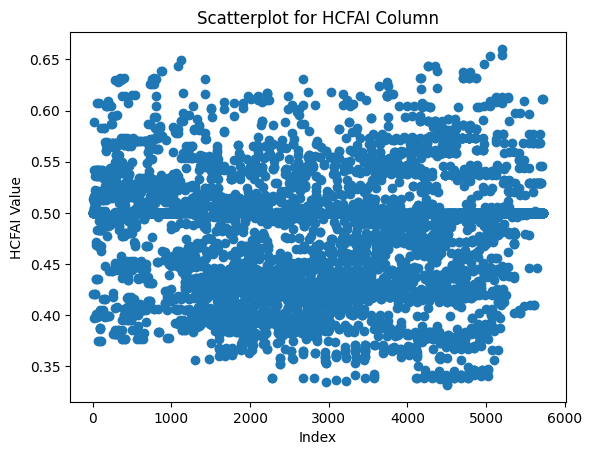

In [69]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


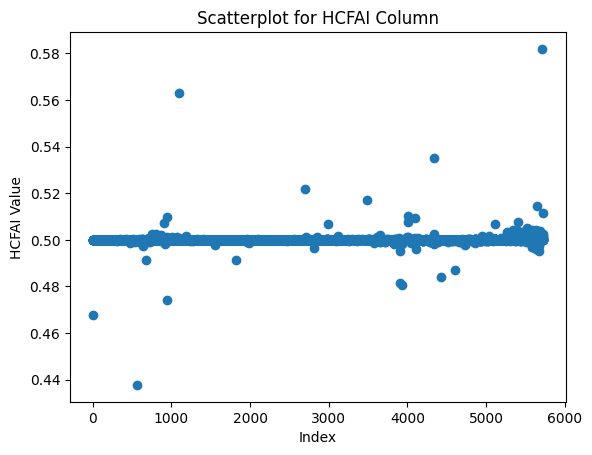

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [72]:
condensed_df

,fid,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,Distance_to_Nearest_RHU_km,Nearest_RHU,Neighbors3,admin_boun,bg_name,...,drought_value,popden_eld,flood_probability_value,popden_all,pr_name,rain_intensity_value,popden_wom,popden_w_1,popden_you,HCFAI
0,2865422,0,0,0,1.0,29.847534,2877844,"2865422, 2866804",bg-2303,Ilio-ilio (Iliw-iliw),...,1.166831,0.000000,0.934144,0.000000,Pangasinan,1.178482,0.000000,0.000000,0.000000,0.500000
1,2866789,0,0,0,1.0,11.042224,2877844,"2866789, 2866790",bg-1910,Macaboboni,...,1.180281,1.229901,0.734487,18.858487,Pangasinan,1.099466,9.052743,4.451071,3.355037,0.513517
2,2866790,0,0,0,0.0,11.392127,2877844,"2866790, 2866791",bg-1910,Macaboboni,...,1.180281,0.000000,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000
3,2866791,0,0,0,0.0,12.122822,2877844,2866791,bg-1910,Macaboboni,...,1.180281,0.000000,0.734487,0.000000,Pangasinan,1.099466,0.000000,0.000000,0.000000,0.500000
4,2866795,0,0,1,0.0,15.836811,2877844,2866795,bg-1903,Aloleng,...,1.221725,1.063497,1.089602,13.017208,Pangasinan,1.154037,6.380984,2.983110,2.217392,0.420395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,2992394,0,0,1,1.0,20.940640,2971664,2992394,bg-335,Pasaleng,...,0.797894,0.000000,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000
5725,2992395,0,0,1,1.0,20.940735,2971664,"2992395, 2991013, 2992394",bg-335,Pasaleng,...,0.797894,0.000000,1.438344,0.000000,Ilocos Norte,2.648136,0.000000,0.000000,0.000000,0.500000
5726,2992396,0,0,1,1.0,21.033190,2971664,"2992396, 2991014, 2992396, 2991014, 2992395",bg-1,Adams (Pob.),...,0.791358,0.000000,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000
5727,2992397,0,0,0,1.0,21.185258,2971664,"2992397, 2991015",bg-1,Adams (Pob.),...,0.791358,0.000000,0.591382,0.000000,Ilocos Norte,2.749202,0.000000,0.000000,0.000000,0.500000


In [71]:
# Specify the file path for the CSV file
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/RG1/rg1-HCFAI-popdensum.csv'
# Export the DataFrame to a CSV file
condensed_df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG1/rg1-HCFAI-popdensum.csv
